In [27]:
import os
import pandas as pd
from xgdatatools import xgimport
from xgdatatools import xgzarc
from xgdatatools import xgstruct

In [28]:
def get_match_header(rec):
    print(rec)

In [29]:
def process_game_file(segment):
    fileversion = -1
    segment.fd.seek(os.SEEK_SET, 0)
    cube_list = []
    while True:
        rec = xgstruct.GameFileRecord(
            version=fileversion).fromstream(segment.fd)
        if rec is None:
            break
        if isinstance(rec, xgstruct.HeaderMatchEntry):
            fileversion = rec.Version
            get_match_header(rec)
        elif isinstance(rec, xgstruct.FooterMatchEntry):
            get_match_header(rec)
        # elif isinstance(rec, xgstruct.HeaderGameEntry):
        #     print(rec)
        elif isinstance(rec, xgstruct.CubeEntry):
            # print(rec)
            cube_list.append(rec)
    return cube_list



In [30]:
xgobj = xgimport.Import('data/Expert-Expert 2023-10-01.xg')

In [31]:
for segment in xgobj.getfilesegment():
    if segment.type == xgimport.Import.Segment.XG_GAMEFILE:
        print('game file')
        cube_list = process_game_file(segment)
    if segment.type == xgimport.Import.Segment.XG_COMMENT:
        print('comment file')
    elif segment.type == xgimport.Import.Segment.XG_ROLLOUTS:
        print('XG_ROLLOUTS')


game file
{'Name': 'MatchInfo', 'EntryType': 0, 'SPlayer1': 'Expert', 'SPlayer2': 'Expert', 'MatchLength': 99999, 'Variation': 0, 'Crawford': True, 'Jacoby': True, 'Beaver': True, 'AutoDouble': False, 'Elo1': 2201.0, 'Elo2': 2201.0, 'Exp1': 400, 'Exp2': 400, 'Date': '2023-10-01 06:53:45', 'SEvent': '', 'GameId': 750028733, 'CompLevel1': 0, 'CompLevel2': 0, 'CountForElo': False, 'AddtoProfile1': False, 'AddtoProfile2': False, 'SLocation': 'eXtreme Gammon', 'GameMode': 4, 'Imported': False, 'SRound': '', 'Invert': 1, 'Version': 30, 'Magic': 1229737284, 'MoneyInitG': 0, 'MoneyInitScore': (0, 0), 'Entered': False, 'Counted': False, 'UnratedImp': False, 'CommentHeaderMatch': -1, 'CommentFooterMatch': -1, 'isMoneyMatch': False, 'WinMoney': 0.0, 'LoseMoney': 0.0, 'Currency': 0, 'FeeMoney': 0.0, 'TableStake': 0, 'SiteId': -1, 'CubeLimit': 10, 'AutoDoubleMax': 0, 'Transcribed': False, 'Event': b'', 'Player1': b'Expert', 'Player2': b'Expert', 'Location': b'eXtreme Gammon', 'Round': b'', 'TimeSet

In [32]:
# リスト内の辞書を展開して、各辞書のキーを列名として使用してDataFrameを作成する
data = []
for cube in cube_list:
    flattened_item = {}
    for key, value in cube.items():
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                flattened_item[f"{key}_{sub_key}"] = sub_value
        else:
            flattened_item[key] = value
    data.append(flattened_item)

df = pd.DataFrame(data)

In [33]:
df.columns

Index(['Name', 'EntryType', 'ActiveP', 'Double', 'Take', 'BeaverR', 'RaccoonR',
       'CubeB', 'Position', 'Doubled_Pos', 'Doubled_Level', 'Doubled_Score',
       'Doubled_Cube', 'Doubled_CubePos', 'Doubled_Jacoby', 'Doubled_Crawford',
       'Doubled_met', 'Doubled_FlagDouble', 'Doubled_isBeaver', 'Doubled_Eval',
       'Doubled_equB', 'Doubled_equDouble', 'Doubled_equDrop',
       'Doubled_LevelRequest', 'Doubled_DoubleChoice3', 'Doubled_EvalDouble',
       'ErrCube', 'DiceRolled', 'ErrTake', 'RolloutIndexD', 'CompChoiceD',
       'AnalyzeC', 'ErrBeaver', 'ErrRaccoon', 'AnalyzeCR', 'isValid',
       'TutorCube', 'TutorTake', 'ErrTutorCube', 'ErrTutorTake',
       'FlaggedDouble', 'CommentCube', 'EditedCube', 'TimeDelayCube',
       'TimeDelayCubeDone', 'NumberOfAutoDoubleCube', 'TimeBot', 'TimeTop',
       'Version'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12474 entries, 0 to 12473
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    12474 non-null  object 
 1   EntryType               12474 non-null  int64  
 2   ActiveP                 12474 non-null  int64  
 3   Double                  12474 non-null  int64  
 4   Take                    12474 non-null  int64  
 5   BeaverR                 12474 non-null  int64  
 6   RaccoonR                12474 non-null  int64  
 7   CubeB                   12474 non-null  int64  
 8   Position                12474 non-null  object 
 9   Doubled_Pos             12474 non-null  object 
 10  Doubled_Level           12474 non-null  int64  
 11  Doubled_Score           12474 non-null  object 
 12  Doubled_Cube            12474 non-null  int64  
 13  Doubled_CubePos         12474 non-null  int64  
 14  Doubled_Jacoby          12474 non-null

In [35]:
df['Doubled_Level'].value_counts()

Doubled_Level
0       5796
1       4763
3       1787
1001     128
Name: count, dtype: int64

In [36]:
df['Doubled_Cube'].value_counts()

Doubled_Cube
0     4455
2     3783
1     3739
4      476
8       20
16       1
Name: count, dtype: int64

<Axes: >

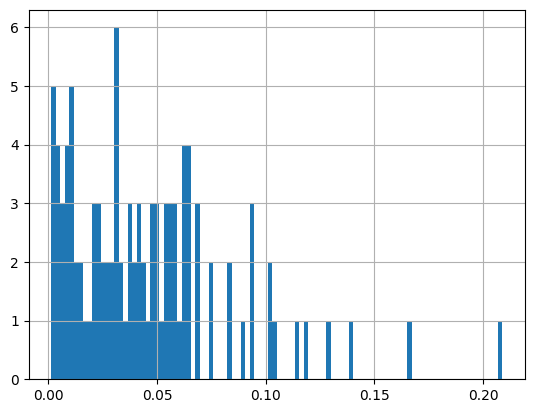

In [37]:
# ErrCube列の値が-1000または0である行を削除する
df_cube = df[(df['ErrCube'] != -1000.0) & (df['ErrCube'] != 0.0)]
df_cube['ErrCube'].hist(bins=100)

In [38]:
df_cube['ErrCube'].describe()

count    104.000000
mean       0.045742
std        0.036929
min        0.001351
25%        0.018521
50%        0.040092
75%        0.062954
max        0.208665
Name: ErrCube, dtype: float64

<Axes: >

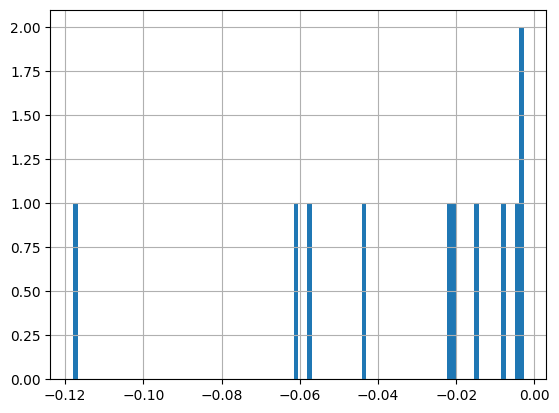

In [39]:
# ErrCube列の値が-1000または0である行を削除する
df_take = df[(df['ErrTake'] != -1000.0) & (df['ErrTake'] != 0.0)]
df_take['ErrTake'].hist(bins=100)

In [40]:
df_take['ErrTake'].describe()

count    11.000000
mean     -0.032292
std       0.035397
min      -0.117985
25%      -0.050248
50%      -0.020435
75%      -0.006305
max      -0.002684
Name: ErrTake, dtype: float64

In [41]:
df.to_pickle('data/xg_data.pkl')

In [42]:
df = pd.read_pickle('data/xg_data.pkl')